# Multiple Linear Regression

## Importing Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression


## Loading Data

In [5]:
df = pd.read_csv("advertising.csv")

In [6]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Splitting Data

In [8]:
features = ["TV", "Radio", "Newspaper"]
X = df[features]nnnnnnn
target = "Sales"
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Build Model

In [12]:
y_mean = y_train.mean()
print("Mean Error: ", y_mean)
y_pred_baseline = [y_mean] * len(y_train)
print("Baseline Error: ", y_pred_baseline[:5])
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
print("MAE Baseline: ", mae_baseline)

Mean Error:  15.330625000000001
Baseline Error:  [15.330625000000001, 15.330625000000001, 15.330625000000001, 15.330625000000001, 15.330625000000001]
MAE Baseline:  4.290828125


### Model Instantiation

In [13]:
model = LinearRegression().fit(X_train, y_train)
model

LinearRegression()

#### Predicition on Training Data

In [24]:
y_pred_training = model.predict(X_train)
print("Predicted values after model: ", y_pred_training[:5])
mae_pred_training = mean_absolute_error(y_train, y_pred_training)
print("MAE for training data after prediction: ", mae_pred_training)

Predicted values after model:  [11.91465765 15.32881375  9.91093345  9.46132618 17.23412363]
MAE after prediction:  1.2344160869575866


#### Prediction on Test Data

In [27]:
y_pred_test = model.predict(X_test)
print("Predicted values after model: ", y_pred_test[:5])
mae_pred_test = mean_absolute_error(y_test, y_pred_test)
print("MAE for test data after prediction: ", mae_pred_test)

Predicted values after model:  [17.0347724  20.40974033 23.72398873  9.27278518 21.68271879]
MAE for test data after prediction:  1.274826210954934


##### Extract Intercept

In [18]:
intercept = model.intercept_
intercept

4.714126402214129

##### Extract Coefficient

In [21]:
coefficient = model.coef_
coefficient

array([0.05450927, 0.10094536, 0.00433665])

## Multi-LinearRegression Equation

In [34]:
print(f"Sales = {intercept} + {coefficient[0]} * TV + {coefficient[1]} * Radio + {coefficient[2]} * Newspaper")

Sales = 4.714126402214129 + 0.05450927083721978 * TV + 0.10094536239295583 * Radio + 0.004336646822034003 * Newspaper


## Model Evaluation

In [22]:
print("Score of training data: ", model.score(X_train, y_train))
print("Score of test data: ", model.score(X_train, y_train))

Score of training data:  0.9001416005862131
Score of test data:  0.9001416005862131


## Actual vs Prediction [Training Data]

Text(0.5, 1.0, 'Actual vs Predicted [Training Data]')

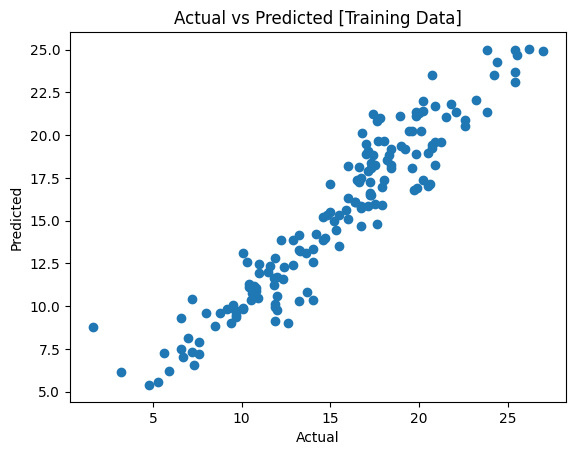

In [31]:
plt.scatter(y_train, y_pred_training)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted [Training Data]")

## Actual vs Prediction [Test Data]

Text(0.5, 1.0, 'Actual vs Predicted [Test Data]')

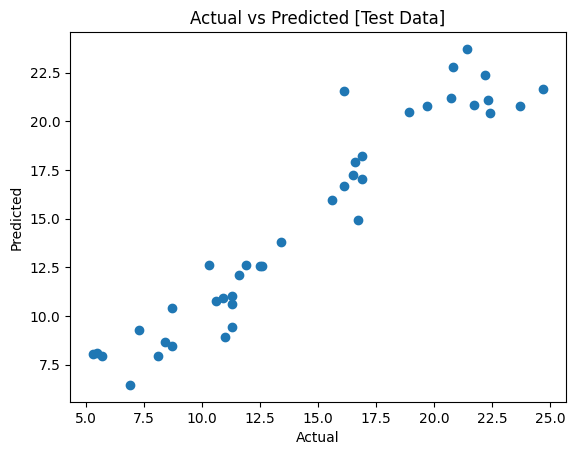

In [32]:
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted [Test Data]")

## Dataframe of Actual vs Prediction Sales

In [33]:
y_pred_test_df = pd.DataFrame({"Actual":y_test, "Predicted":y_pred_test})
y_pred_test_df.head()

,Actual,Predicted
95,16.9,17.034772
15,22.4,20.409740
30,21.4,23.723989
158,7.3,9.272785
128,24.7,21.682719
